<a href="https://colab.research.google.com/github/ManishSharma2002/Deep-learning-/blob/main/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from mlxtend.plotting import plot_decision_regions

In [36]:
from sklearn.datasets import make_circles
x,y = make_circles(n_samples=100,noise= 0.1,random_state= 1)


In [40]:
x

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

In [41]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

<Axes: >

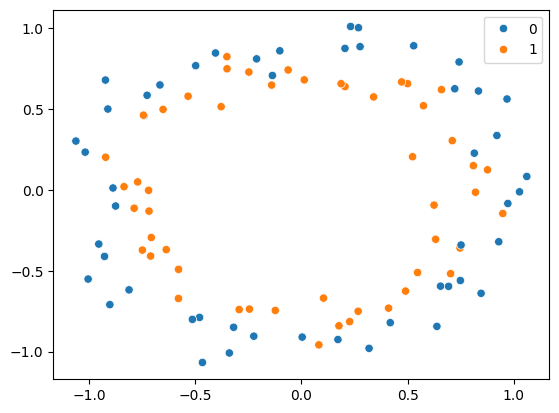

In [43]:
import seaborn as sns
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)

In [48]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [51]:
model  = Sequential()
model.add(Dense(100 ,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [55]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 1000)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4477 - loss: 0.6990 - val_accuracy: 0.6500 - val_loss: 0.6896
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5125 - loss: 0.6974 - val_accuracy: 0.4500 - val_loss: 0.6931
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4461 - loss: 0.6957 - val_accuracy: 0.4500 - val_loss: 0.6964
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5492 - loss: 0.6924 - val_accuracy: 0.3000 - val_loss: 0.6993
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5437 - loss: 0.6915 - val_accuracy: 0.2500 - val_loss: 0.7012
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5125 - loss: 0.6908 - val_accuracy: 0.2500 - val_loss: 0.7033
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5664 - loss: 0.6905 - val_accuracy: 0.2500 - val_loss: 0.7058
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5266 - loss: 0.6895 - val_accuracy: 0.2500 - v

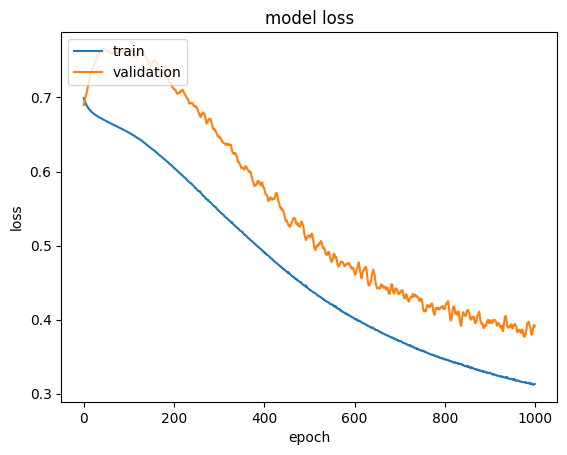

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 663us/step


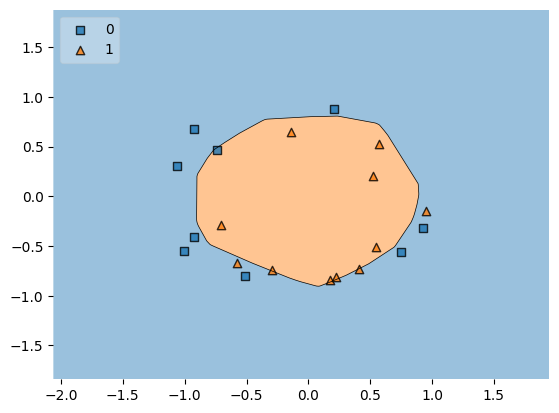

In [58]:
plot_decision_regions(x_test,y_test,clf = model ,legend = 2)
plt.show()

# Early stopping

In [75]:
model1 = Sequential()

In [84]:
model1.add(Dense(200,input_dim = 2,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model1.compile(loss = "binary_crossentropy", optimizer="Adam",metrics = ["accuracy"])

In [87]:
callback = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = True
)


In [94]:
history = model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3000,callbacks=callback)

Epoch 1/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5336 - loss: 0.6927 - val_accuracy: 0.4500 - val_loss: 0.6949
Epoch 2/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5023 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6952
Epoch 3/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5141 - loss: 0.6928 - val_accuracy: 0.4500 - val_loss: 0.6958
Epoch 4/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5063 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6966
Epoch 5/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4867 - loss: 0.6939 - val_accuracy: 0.4500 - val_loss: 0.6973
Epoch 6/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5648 - loss: 0.6899 - val_accuracy: 0.4500 - val_loss: 0.6986
Epoch 7/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4750 - loss: 0.6956 - val_accuracy: 0.4500 - val_loss: 0.6982
Epoch 8/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4633 - loss: 0.6961 - val_accuracy: 0.4500 - v

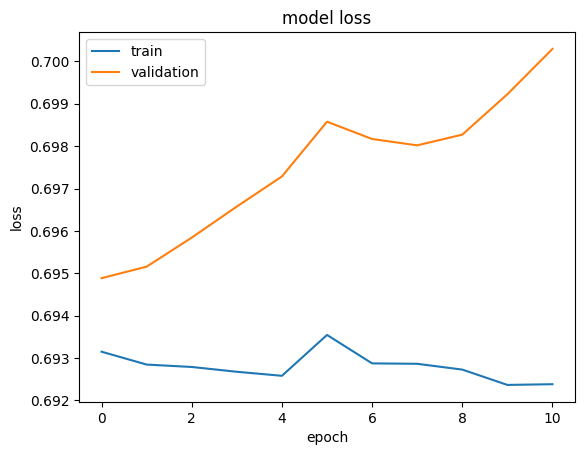

In [96]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 841us/step


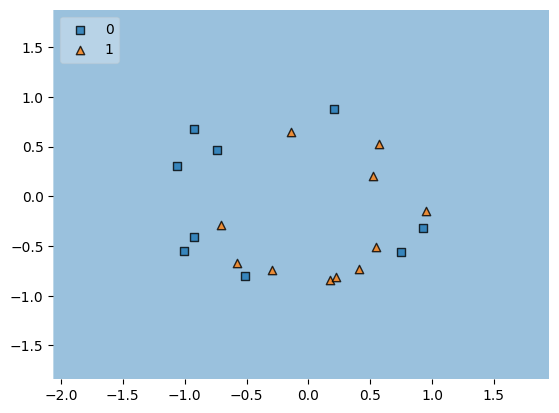

In [97]:
plot_decision_regions(x_test,y_test.ravel(),clf = model1 ,legend = 2)
plt.show()